# **Load Dependencies**

In [ ]:
!pip install pycaret

In [2]:
import pandas as pd
from pycaret.clustering import *

# **Load Data**

In [3]:
df = pd.read_csv('Supermarket Data.csv')

In [4]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))


In [5]:
one_hot  = pd.get_dummies(df['SHOP_WEEKDAY'])
df = df.drop('SHOP_WEEKDAY',axis = 1)
df = df.join(one_hot)

In [6]:
df.tail(5)

SHOP_WEEK  SHOP_DATE  SHOP_HOUR  QUANTITY  SPEND   PROD_CODE  \
956569     200617 2006-06-22         12         3   3.96  PRD0904997   
956570     200633 2006-10-13         20         3   3.96  PRD0904997   
956571     200617 2006-06-22         18         3   3.96  PRD0904997   
956572     200619 2006-07-06         19         3   3.96  PRD0904997   
956573     200635 2006-10-23         21         3   3.96  PRD0904997   

       PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40       CUST_CODE  \
956569      CL00074     DEP00021       G00007       D00002             NaN   
956570      CL00074     DEP00021       G00007       D00002             NaN   
956571      CL00074     DEP00021       G00007       D00002  CUST0000544241   
956572      CL00074     DEP00021       G00007       D00002  CUST0000423155   
956573      CL00074     DEP00021       G00007       D00002             NaN   

       CUST_PRICE_SENSITIVITY CUST_LIFESTAGE        BASKET_ID BASKET_SIZE  \
956569                    NaN            NaN  994101100088778           M   
956570                    NaN            NaN  994102700099738           L   
956571                     LA             YA  994101100506174           L   
956572                     LA             YF  994101300433650           L   
956573                    NaN            NaN  994102900104676           L   

       BASKET_PRICE_SENSITIVITY BASKET_TYPE BASKET_DOMINANT_MISSION  \
956569                       MM      Top Up                   Fresh   
956570                       LA      Top Up                   Fresh   
956571                       LA      Top Up                   Fresh   
956572                       LA   Full Shop                   Fresh   
956573                       MM      Top Up                   Fresh   

        STORE_CODE STORE_FORMAT STORE_REGION  1  2  3  4  5  6  7  
956569  STORE00002           LS          W01  0  0  0  0  1  0  0  
956570  STORE00002           LS          W01  0  0  0  0  0  1  0  
956571  STORE00002           LS          W01  0  0  0  0  1  0  0  
956572  STORE00002           LS          W01  0  0  0  0  1  0  0  
956573  STORE00002           LS          W01  0  1  0  0  0  0  0

In [ ]:
df.info

# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs

Weekday = [mon,tue,wed,thu,fri,sat,sun]



# Calculate features

In [8]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  Mon = (2,'sum'),
                                                                                  Tue = (3,'sum'),
                                                                                  Wed = (4,'sum'),
                                                                                  Thu = (5,'sum'),
                                                                                  Fri = (6,'sum'),
                                                                                  Sat = (7,'sum'),
                                                                                  Sun = (1,'sum'),
                                                                                  ).reset_index()

In [9]:
df_csv.head(10)

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate   LastDate  \
0  CUST0000000181        2.44            1          1 2007-01-06 2007-01-06   
1  CUST0000000369      959.33          220        189 2006-04-16 2008-07-05   
2  CUST0000000689      328.57           16        116 2007-07-22 2008-06-23   
3  CUST0000000998        5.95            3          4 2006-05-04 2006-07-07   
4  CUST0000001163       39.74            4         24 2006-10-22 2008-06-22   
5  CUST0000001194     2493.83          103        403 2006-04-22 2008-06-20   
6  CUST0000002257        1.99            1          1 2006-07-21 2006-07-21   
7  CUST0000002499        0.34            1          1 2006-04-14 2006-04-14   
8  CUST0000002605        1.80            6          1 2006-10-08 2008-06-12   
9  CUST0000002637      124.63           15         53 2006-08-03 2008-05-30   

    Mon    Tue    Wed    Thu    Fri    Sat    Sun  
0   0.0    0.0    0.0    0.0    0.0    1.0    0.0  
1  85.0  116.0   94.0  107.0  121.0   88.0   88.0  
2  39.0   35.0   32.0   34.0   14.0    6.0   25.0  
3   0.0    0.0    0.0    1.0    1.0    0.0    2.0  
4   0.0    0.0    1.0    0.0    0.0   12.0   12.0  
5  99.0  146.0  183.0  181.0  262.0  148.0  179.0  
6   0.0    0.0    0.0    0.0    1.0    0.0    0.0  
7   0.0    0.0    0.0    0.0    1.0    0.0    0.0  
8   0.0    0.0    1.0    3.0    0.0    1.0    1.0  
9  28.0    5.0    0.0    2.0   14.0   20.0   16.0

In [10]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [11]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [12]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [13]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [14]:
df_csv.head(10)

CUST_CODE  TotalSpend  TotalVisits  TotalSKUs  FirstDate   LastDate  \
0  CUST0000000181        2.44            1          1 2007-01-06 2007-01-06   
1  CUST0000000369      959.33          220        189 2006-04-16 2008-07-05   
2  CUST0000000689      328.57           16        116 2007-07-22 2008-06-23   
3  CUST0000000998        5.95            3          4 2006-05-04 2006-07-07   
4  CUST0000001163       39.74            4         24 2006-10-22 2008-06-22   
5  CUST0000001194     2493.83          103        403 2006-04-22 2008-06-20   
6  CUST0000002257        1.99            1          1 2006-07-21 2006-07-21   
7  CUST0000002499        0.34            1          1 2006-04-14 2006-04-14   
8  CUST0000002605        1.80            6          1 2006-10-08 2008-06-12   
9  CUST0000002637      124.63           15         53 2006-08-03 2008-05-30   

    Mon    Tue    Wed    Thu    Fri    Sat    Sun  TicketSize  total_days  \
0   0.0    0.0    0.0    0.0    0.0    1.0    0.0    2.440000           1   
1  85.0  116.0   94.0  107.0  121.0   88.0   88.0    4.360591         812   
2  39.0   35.0   32.0   34.0   14.0    6.0   25.0   20.535625         338   
3   0.0    0.0    0.0    1.0    1.0    0.0    2.0    1.983333          65   
4   0.0    0.0    1.0    0.0    0.0   12.0   12.0    9.935000         610   
5  99.0  146.0  183.0  181.0  262.0  148.0  179.0   24.211942         791   
6   0.0    0.0    0.0    0.0    1.0    0.0    0.0    1.990000           1   
7   0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.340000           1   
8   0.0    0.0    1.0    3.0    0.0    1.0    1.0    0.300000         614   
9  28.0    5.0    0.0    2.0   14.0   20.0   16.0    8.308667         667   

   recency  
0      547  
1        1  
2       13  
3      730  
4       14  
5       16  
6      716  
7      814  
8       24  
9       37

In [29]:
df_csv.shape

(6100, 16)

# **Cluster customers**

In [15]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate'], normalize=True)

Description                 Value
0                               session_id                  3735
1                            Original Data            (6100, 16)
2                           Missing Values                 False
3                         Numeric Features                    13
4                     Categorical Features                     0
5                         Ordinal Features                 False
6                High Cardinality Features                 False
7                  High Cardinality Method                  None
8                         Transformed Data            (6100, 13)
9                                 CPU Jobs                    -1
10                                 Use GPU                 False
11                          Log Experiment                 False
12                         Experiment Name  cluster-default-name
13                                     USI                  d765
14                         Imputation Type                simple
15          Iterative Imputation Iteration                  None
16                         Numeric Imputer                  mean
17      Iterative Imputation Numeric Model                  None
18                     Categorical Imputer                  mode
19  Iterative Imputation Categorical Model                  None
20           Unknown Categoricals Handling        least_frequent
21                               Normalize                  True
22                        Normalize Method                zscore
23                          Transformation                 False
24                   Transformation Method                  None
25                                     PCA                 False
26                              PCA Method                  None
27                          PCA Components                  None
28                     Ignore Low Variance                 False
29                     Combine Rare Levels                 False
30                    Rare Level Threshold                  None
31                         Numeric Binning                 False
32                         Remove Outliers                 False
33                      Outliers Threshold                  None
34                Remove Multicollinearity                 False
35             Multicollinearity Threshold                  None
36             Remove Perfect Collinearity                 False
37                              Clustering                 False
38                    Clustering Iteration                  None
39                     Polynomial Features                 False
40                       Polynomial Degree                  None
41                    Trignometry Features                 False
42                    Polynomial Threshold                  None
43                          Group Features                 False
44                       Feature Selection                 False
45                Feature Selection Method               classic
46            Features Selection Threshold                  None
47                     Feature Interaction                 False
48                           Feature Ratio                 False
49                   Interaction Threshold                  None

In [16]:
models()

Name                                          Reference
ID                                                                                            
kmeans                   K-Means Clustering                     sklearn.cluster._kmeans.KMeans
ap                     Affinity Propagation  sklearn.cluster._affinity_propagation.Affinity...
meanshift             Mean Shift Clustering              sklearn.cluster._mean_shift.MeanShift
sc                      Spectral Clustering       sklearn.cluster._spectral.SpectralClustering
hclust             Agglomerative Clustering  sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan     Density-Based Spatial Clustering                     sklearn.cluster._dbscan.DBSCAN
optics                    OPTICS Clustering                     sklearn.cluster._optics.OPTICS
birch                      Birch Clustering                       sklearn.cluster._birch.Birch
kmodes                   K-Modes Clustering                               kmodes.kmodes.KModes

In [17]:
get_metrics()

Name       Display Name  ... Needs Ground Truth Custom
ID                                                 ...                          
silhouette          Silhouette         Silhouette  ...              False  False
chs          Calinski-Harabasz  Calinski-Harabasz  ...              False  False
db              Davies-Bouldin     Davies-Bouldin  ...              False  False
hs           Homogeneity Score        Homogeneity  ...               True  False
ari                 Rand Index         Rand Index  ...               True  False
cs          Completeness Score       Completeness  ...               True  False

[6 rows x 9 columns]

# Compare model performance

In [18]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0     -0.2641            43.9655  ...           0             0

[1 rows x 6 columns]

In [19]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

# Spectral Clustering Clustering

In [20]:
sc = create_model('sc')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.8317           172.7749  ...           0             0

[1 rows x 6 columns]

In [ ]:
plot_model(sc)

# KMeans Clustering

In [21]:
kmeans = create_model('kmeans')

Silhouette  Calinski-Harabasz  ...  Rand Index  Completeness
0      0.3978          5478.4621  ...           0             0

[1 rows x 6 columns]

In [22]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=3735, tol=0.0001, verbose=0)


In [23]:
plot_model(kmeans)

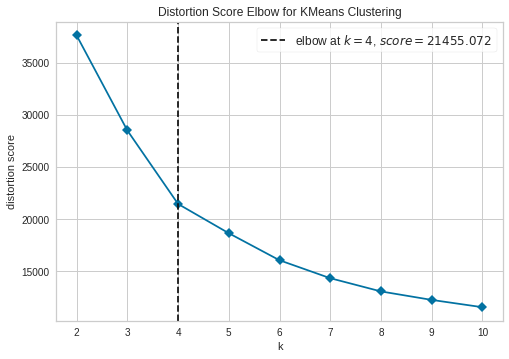

In [24]:
plot_model(kmeans, plot = 'elbow')

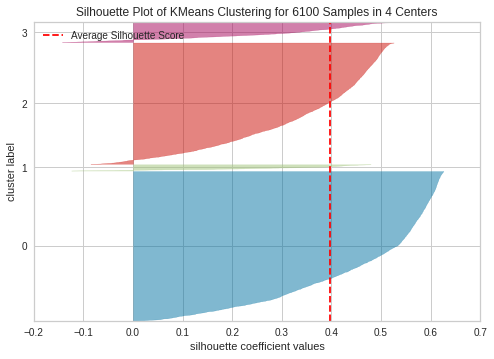

In [25]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# **Interpret results and plan for actions**

In [26]:
kmeans_results = assign_model(kmeans)
print(kmeans_results)

           CUST_CODE  TotalSpend  TotalVisits  ...  total_days recency    Cluster
0     CUST0000000181        2.44            1  ...           1     547  Cluster 0
1     CUST0000000369      959.33          220  ...         812       1  Cluster 3
2     CUST0000000689      328.57           16  ...         338      13  Cluster 2
3     CUST0000000998        5.95            3  ...          65     730  Cluster 0
4     CUST0000001163       39.74            4  ...         610      14  Cluster 2
...              ...         ...          ...  ...         ...     ...        ...
6095  CUST0000999593      453.58           30  ...         698      95  Cluster 2
6096  CUST0000999645      105.11           11  ...         740      59  Cluster 2
6097  CUST0000999654        5.86            1  ...           1     742  Cluster 0
6098  CUST0000999935      444.17           21  ...         555      31  Cluster 2
6099  CUST0000999936       17.67            6  ...         624      80  Cluster 2

[6100 rows x 17

In [27]:
plot_model(kmeans, plot = 'distribution')

In [30]:
plot_model(kmeans, plot = 'distribution', feature = 'Sun')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'Mon')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'Tue')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'Wed')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'Thu')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'Fri')

In [ ]:
plot_model(kmeans, plot = 'distribution', feature = 'Sat')

In [32]:
plot_model(kmeans, plot = 'distribution', feature = 'TotalVisits')

In [33]:
plot_model(kmeans, plot = 'distribution', feature = 'TotalSKUs')

In [34]:
plot_model(kmeans, plot = 'distribution', feature = 'TotalSpend')

In [35]:
plot_model(kmeans, plot = 'distribution', feature = 'recency')

In [36]:
plot_model(kmeans, plot = 'distribution', feature = 'TicketSize')

In [37]:
plot_model(kmeans, plot = 'distribution', feature = 'total_days')

In [38]:
plot_model(kmeans, plot = 'tsne')

#สรุป 
ตัวแปร วันที่มาใช้บริการ ค่อนข้างไม่มีผลต่อการจัดกลุ่มเพราะว่า แต่ละกลุ่มก็จะคล้ายๆ กัน 

Cluster 0 (ขาจร) : จะเป็นกลุ่มที่มีจำนวนเยอะที่สุด แต่ถ้าหากดูจากพฤติกรรมแล้ว ส่วนมากจะเป็นขาจร คือ มีการใช้จ่ายน้อย จำนวนครั้งในการซื้อน้อบ แล้วกจำนวนครั้งที่มาน้อย   อาจจะให้ส่วนลดพิเศษ สำหรับลูกค้าที่มาใช้จ่ายบ่อย เพื่อดึงดูดลูกค้ากลุ่มนี้ได้ 

Cluster 1 (ลูกค้าประจำชั้นยอด): เป็นกลุ่มที่เป็นสามชิกนานที่สุด มาใช้จ่ายประจำ และ ใช้จ่ายเยอะที่สุด สำหรับกลุ่มนี้ เราสามารถให้ สิทธิพิเศษ เพื่อทำให้เค้ามาใช้บริการที่ร้านต่อๆไป

Cluster 2 (ขากลาง): เป็นกลุ่มที่มีจำนวนรองลงมา จากกลุ่มขาจร เป็นกลุ่มที่อยู่ระหว่างขาจรและขาประจำ มีการใช้จ่ายโดยเฉลี่ยเยอะกว่ากลุ่มขาจร สำหรับกลุ่มนี้อาจจะเป็นกลุ่มที่เข้ามาใช้จ่ายช่วงมีโปรโมชั่นได้

Cluster 3 (ลูกค้าประจำ): เป็นกลุ่มที่ มีเป็นสมาชิกนาน น้อยกว่า กลุ่มชั้นยอด แต่ว่า มียอดการใช้จ่ายสูง และวันที่มาเป็นประจำ กลุ่มนี้สามารถให้สิทธิพิเศษที่ใกล้เคียงกับกลุ่ม ชั้นยอดได้เลย 